# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from config import api_key  #crucial to keep this private so other's cannot exploit your key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy  #python library 

# Output File (CSV)
# output_data_file = "output_data/cities.csv" I deviate from the starter code as I will store my results later 

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# Create empty lists to hold the latitude and longititude along with the city name
lat_lngs = [] #empty list as denoted by []
cities = []

# Create a set of random latitude and longitude combinations; will use the random library to do this 
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)  #furthermore using random.uniform to get a uniformly distributed sample https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)  #using the zip method () to join two lists or tuples together

# Identify nearest city for each latitude and longtitude combination using a for loop 
for each_lat_lng in lat_lngs:
    city = citipy.nearest_city(each_lat_lng[0], each_lat_lng[1]).city_name  #using the citypy library here to do the heavy lifting
    
    # If the city is unique, then add it to a our cities list; adding using the append method
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count using the len global method
len(cities)

636

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [18]:
# First need to create empty container to hold the results: 
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0  #these counters will be used in the print statements to keep track of the number of results 
set_counter = 1

# Set the base url to tell it what server we are pinging as a client for data 
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #select units as found in api documentation: https://openweathermap.org/current
query_url = f"{base_url}appid={api_key}&units={units}&q=" #search url as dictated by the api documentation using f string to use more sophisticated method

# For each city name in cities list, perform the following:
for index, city in enumerate(cities, start = 1):  #using a new in enumerate method: https://realpython.com/python-enumerate/
    try:
        response = requests.get(query_url + city).json() #requests.get method to extract the data and make it JSON format; JavaScript Object Notation how must APIs are read  
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 20:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : City name is: {city}") 
  
    except(KeyError, IndexError):   #except will handle errors and allow the code to continue to run and not time out
        print("City not found. Skipping.")
        
print("Search complete")

Processing Record 1 of Set 1 : City name is: ushuaia
Processing Record 2 of Set 1 : City name is: yar-sale
City not found. Skipping.
Processing Record 3 of Set 1 : City name is: punta arenas
Processing Record 4 of Set 1 : City name is: hithadhoo
City not found. Skipping.
Processing Record 5 of Set 1 : City name is: binzhou
Processing Record 6 of Set 1 : City name is: port macquarie
Processing Record 7 of Set 1 : City name is: rikitea
Processing Record 8 of Set 1 : City name is: bubaque
Processing Record 9 of Set 1 : City name is: yellowknife
City not found. Skipping.
Processing Record 10 of Set 1 : City name is: karacakoy
Processing Record 11 of Set 1 : City name is: bredasdorp
Processing Record 12 of Set 1 : City name is: araouane
Processing Record 13 of Set 1 : City name is: tuatapere
Processing Record 14 of Set 1 : City name is: mataura
Processing Record 15 of Set 1 : City name is: chokurdakh
Processing Record 16 of Set 1 : City name is: castro
Processing Record 17 of Set 1 : City n

Processing Record 12 of Set 7 : City name is: ambilobe
Processing Record 13 of Set 7 : City name is: oktyabrskiy
Processing Record 14 of Set 7 : City name is: hilo
Processing Record 15 of Set 7 : City name is: kargasok
Processing Record 16 of Set 7 : City name is: moindou
Processing Record 17 of Set 7 : City name is: quatre cocos
Processing Record 18 of Set 7 : City name is: saint anthony
Processing Record 19 of Set 7 : City name is: jacksonville beach
Processing Record 20 of Set 7 : City name is: lipari
Processing Record 21 of Set 7 : City name is: tiksi
Processing Record 0 of Set 8 : City name is: fairbanks
Processing Record 1 of Set 8 : City name is: gamba
Processing Record 2 of Set 8 : City name is: roma
Processing Record 3 of Set 8 : City name is: puerto narino
Processing Record 4 of Set 8 : City name is: esperance
Processing Record 5 of Set 8 : City name is: ilulissat
Processing Record 6 of Set 8 : City name is: ust-kuyga
Processing Record 7 of Set 8 : City name is: ulladulla
Pro

Processing Record 8 of Set 20 : City name is: mana
Processing Record 9 of Set 20 : City name is: kailua
Processing Record 10 of Set 20 : City name is: egvekinot
Processing Record 11 of Set 20 : City name is: san patricio
Processing Record 12 of Set 20 : City name is: sinop
Processing Record 13 of Set 20 : City name is: strezhevoy
Processing Record 14 of Set 20 : City name is: hualmay
Processing Record 15 of Set 20 : City name is: staryy nadym
Processing Record 16 of Set 20 : City name is: petropavlovsk-kamchatskiy
City not found. Skipping.
Processing Record 17 of Set 20 : City name is: kousseri
Processing Record 18 of Set 20 : City name is: erzin
Processing Record 19 of Set 20 : City name is: havre-saint-pierre
Processing Record 20 of Set 20 : City name is: grafton
Processing Record 21 of Set 20 : City name is: mamallapuram
Processing Record 0 of Set 21 : City name is: esqueda
Processing Record 1 of Set 21 : City name is: ramgarh
Processing Record 2 of Set 21 : City name is: auki
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# To create a dataframe need to create a list of dictionaries or a dictionary of lists 
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,  #the order these are written is the order they will appear in the dataframe
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
})

weather_dict #display the newly created dataframe

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,51.80,43,75,23.02,AR,1611604109
1,Yar-Sale,66.8333,70.8333,-20.42,87,100,15.05,RU,1611604110
2,Punta Arenas,-53.1500,-70.9167,51.80,46,75,24.16,CL,1611604110
3,Hithadhoo,-0.6000,73.0833,81.63,73,67,3.74,MV,1611604110
4,Binzhou,37.3667,118.0167,31.59,93,90,2.86,CN,1611604111
...,...,...,...,...,...,...,...,...,...
574,Luga,58.7372,29.8453,33.94,96,100,5.50,RU,1611604226
575,Norman Wells,65.2820,-126.8329,-16.60,83,75,4.61,CA,1611604226
576,Batagay,67.6333,134.6333,-43.98,75,86,1.34,RU,1611604226
577,Chapecó,-27.0964,-52.6183,71.60,100,75,4.61,BR,1611604178


In [20]:
weather_dict.count() #testing to make sure each row has an equal amount of data

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [21]:
# Exporting the data to a .csv; will be saved into the output_data folder ../ is telling computer to go up one directory 
weather_dict.to_csv("../output_data/cities_data.csv", index = False) #setting the index to false so i don't have an additional index column

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
humidity = weather_dict["Humidity"].max()
humidity #using the .max() method to see what the max value is in the humidity column; it is 100 so we can skip the removal

100

In [23]:
# Starter code uses a .describe() method which all shows us that the max humidity is 100

In [24]:
#  Get the indices of cities that have humidity over 100%.
# we know that nothing over 100 exists so we may skip this part 

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

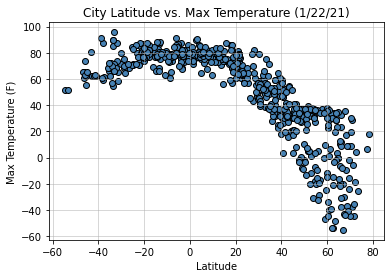

In [26]:
# Create the scatter plot using plt.scatter method available to non-Pandas object 
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black") #x and y values are requirements

# Set title and other standard chart elements
plt.title("City Latitude vs. Max Temperature (1/25/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5) #recall alpha is the amount of opaqueness ie how dark line will be drawn

# Save the plotted figure using the savifig() method 
plt.savefig("../Images/City Latitude vs Max Temperature.png")

In the plot above we are analyzing the effect on max temperature with regards to a city's latitude.  One would expect to see the max temperature decrease as latitude increases, which is evidenced by the plot.

## Latitude vs. Humidity Plot

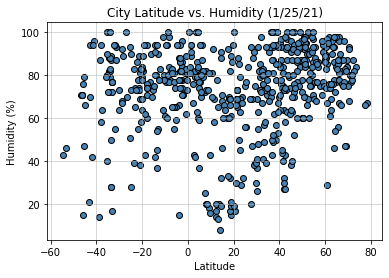

In [27]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")  #colors are customizable

# Set title
plt.title("City Latitude vs. Humidity (1/25/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the plotted figure 
plt.savefig("../Images/City Latitude vs Humidity.png")

In the plot above we are analyzing the effect on the percentage of humidity with regards to a city's latitude.  One would expect to see humidity decrease as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Cloudiness Plot

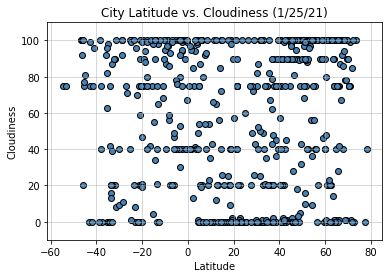

In [28]:
# Create the scatter plot using plt.scatter available to pyplot 
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (1/25/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness")
plt.ylim(-10,110) #setting this to get a better picture of the data 

# Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha=0.5)

# Save the plotted figure 
plt.savefig("../Images/City Latitude vs Cloudiness.png")

In the plot above we are analyzing the trend between cloudiness and a city's latitude.  One would expect to see more clouds as latitude increases, however there is no strong evidence in the plot.

## Latitude vs. Wind Speed Plot

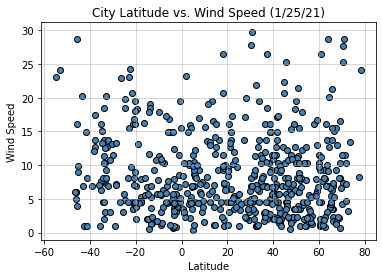

In [29]:
# Create the scatter plot using plt.scatter
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Wind Speed (1/25/21)")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed")

# Set grid lines
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure 
plt.savefig("../Images/City Latitude vs Wind Speed.png")

In the plot above we are analyzing the trend between wind speed and a city's latitude.  One would expect to see windier conditions as latitude increases.

## Linear Regression

In [30]:
# Create individual Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0] #northern hemisphere is where latitude is >= 0
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0] #southern hemisphere is where latitude is <0

In [31]:
# Define a function for creating linear regression and scatter plot
def linear_regression(x,y):  #can use def here to tell program how we are creating our linear regression 
    print(f"Pearson's r-value is : {(st.pearsonr(x, y)[0])}")  #st.pearsonr(x,y) 
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)   
    regression_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regression_values,"r-")
    return line_eq  #return to plot the linear equation line on the graph

# Define a fuction for annotating the linear regression equation on the plot
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Pearson's r-value is : -0.8539423406335444


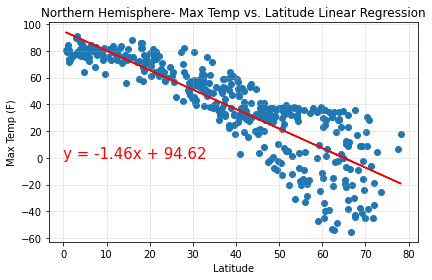

In [32]:
# Northern Hemisphere

# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, 0, 0) #placement of linear regression line equation at (0,0) using annotate method https://www.geeksforgeeks.org/function-annotations-python/

# Set a title
plt.title("Northern Hemisphere- Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Northern Hemisphere- Max Temp vs. Latitude Linear Regression.png")

The scholary evidence I will be using to evaluate Pearson's Coefficient of R values and their meaning can be found here: https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/#:~:text=The%20correlation%20coefficient%20can%20range,from%20%E2%88%921%20to%20%2B1.&text=For%20the%20Pearson%20correlation%2C%20an,linear%20relationship%20between%20the%20variables.

Observation: The r-value of -0.85 denotes a strong negative correlation between temperature and latitude in the Northern Hemisphere.  As latitude increases, temperature decreases (ie moving closer towards the North Pole).

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Pearson's r-value is : 0.525383641480286


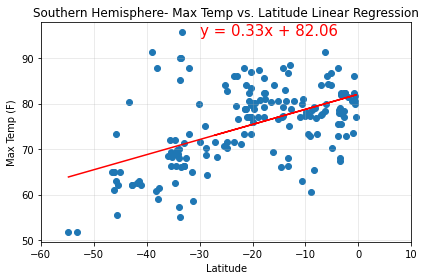

In [55]:
# Southern Hemisphere

# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call on function 2
annotate(equation, -30, 95) #placement of linear regression line equation at (-30,95)

# Set a title
plt.title("Southern Hemisphere- Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set x limit to get a better picture of data 
plt.xlim(-60,10) #using plt.xlim method 

# Set ylabel
plt.ylabel("Max Temp (F)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Southern Hemisphere- Max Temp vs. Latitude Linear Regression.png")

Observation: The r-value of 0.52 denotes a moderate correlation between temperature and latitude in the Southern Hemisphere.  As latitude increases, temperature slighty increases (ie moving closer towards the Equator).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Pearson's r-value is : 0.3109032386166246


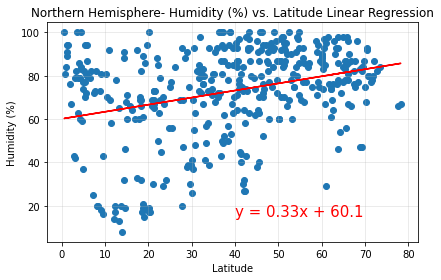

In [34]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call on function #2
annotate(equation, 40, 15) #placement of linear regression line equation at (40,15)

# Set a title
plt.title("Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Northern Hemisphere- Humidity (%) vs. Latitude Linear Regression.png")

Observation: The r-value of 0.31 denotes a weak correlation between humidity and latitude in the Northern Hemisphere.  As latitude increases, humidity slighty increases (ie moving closer towards the North Pole).

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Pearson's r-value is : 0.20683019786496165


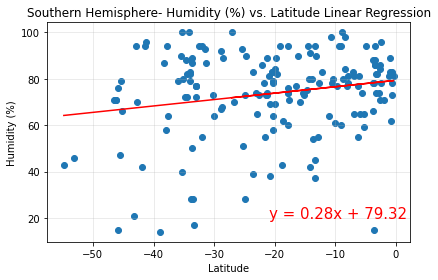

In [48]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call on function 2
annotate(equation, -21, 20) #placement of linear regression line equation at (-21,20)

# Set title
plt.title("Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression.png")

Observation: The r-value of 0.21 denotes a weak correlation between humidity and latitude in the Southern Hemisphere.  As latitude increases, humidity slighty increases (ie moving closer towards the Equator).

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Pearson's r-value is : 0.18089962866953696


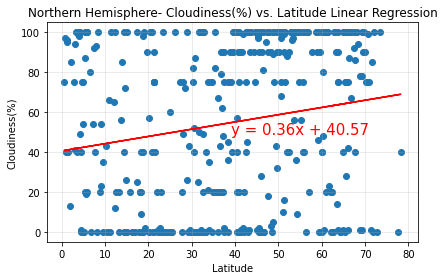

In [60]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call on function 2
annotate(equation, 39, 49) #placement of linear regression line equation at (39,49)

# Set a title
plt.title("Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness(%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Northern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression.png")

Observation: The r-value of 0.18 denotes no correlation between cloudiness and latitude in the Northern Hemisphere.  As latitude increases, humidity slighty increases (ie moving closer towards the North Pole).  This means that there is no observable trend that can be made about the amount of clouds and location.  We would expect this because any city can have their fair share of cloudy days.  Some may expect cloudiness to increase as latitude increases, but this is not the case based on the data.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Pearson's r-value is : 0.2139295454710584


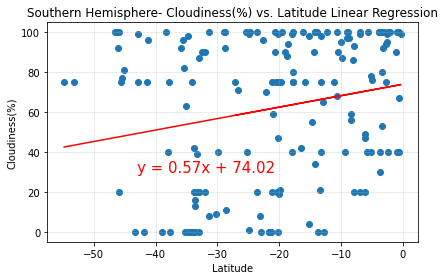

In [64]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call on function 2
annotate(equation, -43, 30) #placement of linear regression line equation at (-43,30)

# Set a title
plt.title("Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness(%)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Southern Hemisphere- Cloudiness(%) vs. Latitude Linear Regression.png")

Observation: The r-value of 0.21 denotes a weak correlation between cloudiness and latitude in the Southern Hemisphere. As latitude increases, cloudiness slighty increases (ie moving closer towards the Equator).  Once again, this means that there is no observable trend that can be made about the amount of clouds and location. We would expect this because any city can have their fair share of cloudy days. Some may expect cloudiness to decrease as latitude increases, but this is not the case based on the data.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Pearson's r-value is : 0.01716999890343874


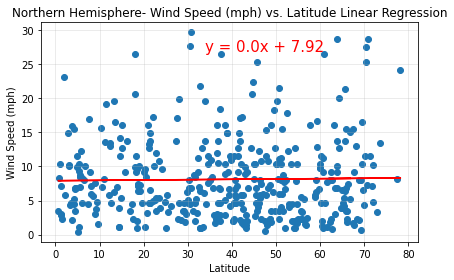

In [70]:
# Call on function 1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, 34, 27) #placement of linear regression line equation at (34,27)

# Set title
plt.title("Northern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Northern Hemisphere- Wind Speed vs. Latitude Linear Regression.png")

Observation: The r-value of 0.02 denotes no correlation between wind speed and latitude in the Northern Hemisphere. This means that there is no observable trend that can be made about the amount of wind and location. We would expect this because any city can have their fair share of windy days.  Factors such as proximity to mountains and basins dicate wind speed, not positional location. Some may expect windiness to increase as latitude increases, but this is not the case based on the data

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Pearson's r-value is : -0.2599765267697255


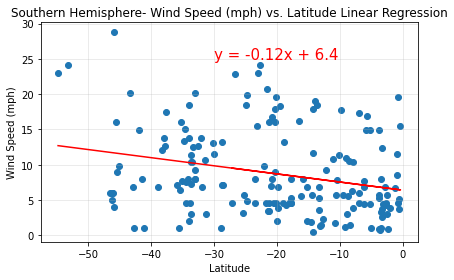

In [71]:
# Call on function 1
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call on function 2
annotate(equation, -30, 25) #placement of linear regression line equation at (-30,25)

# Set  title
plt.title("Southern Hemisphere- Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Set grid lines
plt.grid(linestyle='-', linewidth=0.5, alpha = 0.5)

plt.tight_layout() #help tidy up the layout; will help keep eveything in proportion

# Save the figure
plt.savefig("../Images/Southern Hemisphere- Wind Speed vs. Latitude Linear Regression.png")

Observation: The r-value of -0.26 denotes a weak negative correlation between wind speed and latitude in the Southern Hemisphere. As latitude increases, wind speeds slighty decrease (ie moving closer towards the Equator).  Once again, this means that there is no observable trend that can be made about the amount of wind and location. We would expect this because any city can have their fair share of windy days. Once again, this is due to the fact that wind speeds are based upon multiple factors and not solely on position.